In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#reading data
df1=pd.read_csv("D:/p1/safety/features/11.csv")
df2=pd.read_csv("D:/p1/safety/features/12.csv")
df3=pd.read_csv("D:/p1/safety/features/13.csv")
df4=pd.read_csv("D:/p1/safety/features/14.csv")
df5=pd.read_csv("D:/p1/safety/features/15.csv")
df6=pd.read_csv("D:/p1/safety/features/16.csv")
df7=pd.read_csv("D:/p1/safety/features/17.csv")
df8=pd.read_csv("D:/p1/safety/features/18.csv")
df9=pd.read_csv("D:/p1/safety/features/19.csv")
df10=pd.read_csv("D:/p1/safety/features/110.csv")

In [6]:
#combine datasets
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
data = pd.concat(df_list)

In [7]:
#removing duplicacys by takimg the median of the 
data=data.groupby('bookingID').median().reset_index()
data

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,8.0000,144.299423,-0.725250,-9.622127,-1.607663,0.002575,-0.002239,-0.003522,1087.5,8.503366
1,1,3.9000,110.000000,-0.563126,9.537963,-2.175822,-0.001518,-0.003491,-0.000384,607.0,6.904588
2,2,3.6340,233.000000,0.433364,9.814133,0.366324,0.001164,0.001035,0.001764,97.0,2.998761
3,4,10.0000,134.210114,-0.381168,-9.364999,-2.608658,-0.022799,0.024504,-0.001147,547.5,3.310000
4,6,4.0040,256.000000,0.476461,9.562734,2.336812,0.000569,0.003724,0.002902,547.0,1.936962
5,7,3.9000,57.000000,1.386000,9.375000,2.099000,-0.008553,-0.001222,-0.003666,481.0,13.017325
6,8,6.0680,214.000000,-1.106674,9.401672,1.769379,0.003174,0.000320,0.000168,268.0,3.500000
7,10,3.9000,112.000000,0.922958,9.317032,-1.565811,0.000824,-0.000244,-0.000946,187.0,9.580000
8,11,3.9000,124.000000,0.495615,9.751882,0.586597,0.006337,-0.001226,0.000739,112.0,5.192059
9,13,6.0000,247.000000,1.029538,8.699597,4.438985,-0.001604,0.006393,0.003620,613.5,20.151251


In [8]:
#adding additional columns
data['Distance'] = data['Speed'] * data['second']
data['Acceleration'] = np.sqrt(np.power(data['acceleration_x'], 2) + np.power(data['acceleration_y'], 2) + np.power(data['acceleration_z'], 2))
data['Magnitude'] = np.sqrt(np.power(data['gyro_x'], 2) + np.power(data['gyro_y'], 2) + np.power(data['gyro_z'], 2))

In [9]:
#reding the other dataset
labels = pd.read_csv('D:/p1/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

dangerousCol = []

for row in data['bookingID']:
    if row not in labels['bookingID']:
        dangerousCol.append(None)
    else:
        dangerousCol.append(labels.loc[row, 'label'])
            
data['Dangerous'] = dangerousCol
data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Distance,Acceleration,Magnitude,Dangerous
0,0,8.000,144.299423,-0.725250,-9.622127,-1.607663,0.002575,-0.002239,-0.003522,1087.5,8.503366,9247.409999,9.782428,0.004904,0.0
1,1,3.900,110.000000,-0.563126,9.537963,-2.175822,-0.001518,-0.003491,-0.000384,607.0,6.904588,4191.084734,9.799186,0.003826,1.0
2,2,3.634,233.000000,0.433364,9.814133,0.366324,0.001164,0.001035,0.001764,97.0,2.998761,290.879788,9.830524,0.002353,0.0
3,4,10.000,134.210114,-0.381168,-9.364999,-2.608658,-0.022799,0.024504,-0.001147,547.5,3.310000,1812.224969,9.729008,0.033490,0.0
4,6,4.004,256.000000,0.476461,9.562734,2.336812,0.000569,0.003724,0.002902,547.0,1.936962,1059.518159,9.855637,0.004756,0.0


In [10]:
#drop rows with null values
data.isnull().sum()


bookingID             0
Accuracy              0
Bearing               0
acceleration_x        0
acceleration_y        0
acceleration_z        0
gyro_x                0
gyro_y                0
gyro_z                0
second                0
Speed                 0
Distance              0
Acceleration          0
Magnitude             0
Dangerous         19887
dtype: int64

In [12]:

data = data[pd.notnull(data['Dangerous'])]
data['Dangerous'] = data['Dangerous'].astype(int)
data.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
Distance          0
Acceleration      0
Magnitude         0
Dangerous         0
dtype: int64

In [13]:
#Prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def runModel(estimators, criterion, drawGraph):
    columns = ["Accuracy", "Bearing", "Acceleration", "Magnitude", "Speed", "second"]
    
    y = data["Dangerous"]
    X = pd.DataFrame(data[columns])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

    m = RandomForestClassifier(n_estimators=estimators, criterion=criterion)
    m.fit(X_train, y_train)

    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)

    
    if(drawGraph):
        f, axes = plt.subplots(1, 2, figsize=(24, 12))
        axes[0].scatter(y_train, y_train_pred, color = "blue")
        axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
        axes[0].set_xlabel("True values of the Response Variable (Train)")
        axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
        axes[1].scatter(y_test, y_test_pred, color = "green")
        axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
        axes[1].set_xlabel("True values of the Response Variable (Test)")
        axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
        plt.show()
        
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Explained Variance (R^2) \t:", m.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        print("Goodness of Fit of Model \tTest Dataset")
        print("Explained Variance (R^2) \t:", m.score(X_test, y_test))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()
        
        feat_importances = pd.Series(m.feature_importances_, index=data[columns].columns)

        f, axes = plt.subplots(1, 1, figsize=(10, 5))
        feat_importances.nlargest(10).plot(kind='barh')
    
    return [estimators, m.score(X_train, y_train), m.score(X_test, y_test), criterion]

In [14]:

results = []

results.append(runModel(10, 'gini', False))
results.append(runModel(25, 'gini', False))
results.append(runModel(50, 'gini', False))
results.append(runModel(100, 'gini', False))
results.append(runModel(200, 'gini', False))

results.append(runModel(10, 'entropy', False))
results.append(runModel(25, 'entropy', False))
results.append(runModel(50, 'entropy', False))
results.append(runModel(100, 'entropy', False))
results.append(runModel(200, 'entropy', False))

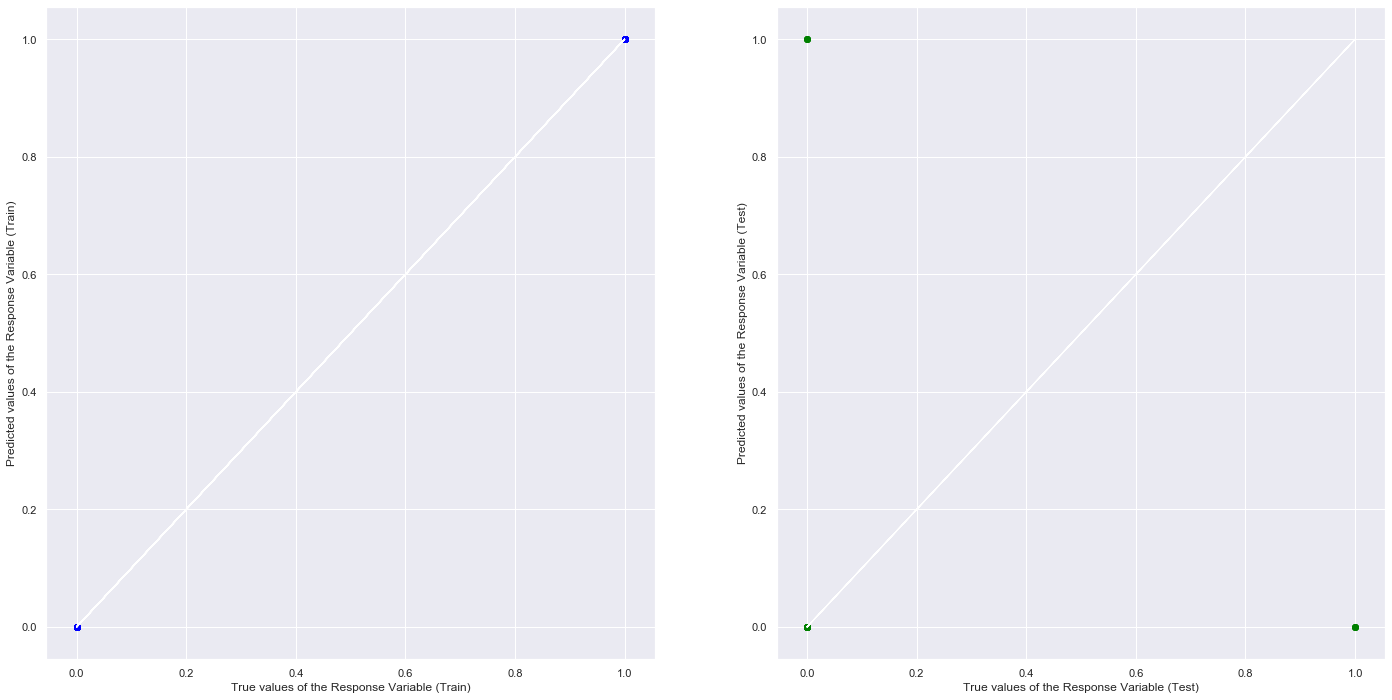

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7391304347826086
Mean Squared Error (MSE) 	: 0.2608695652173913



[200, 1.0, 0.7391304347826086, 'entropy']

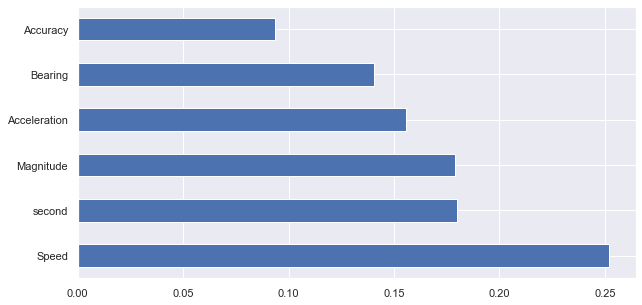

In [19]:
#setting model parameters
runModel(200, 'entropy', True)

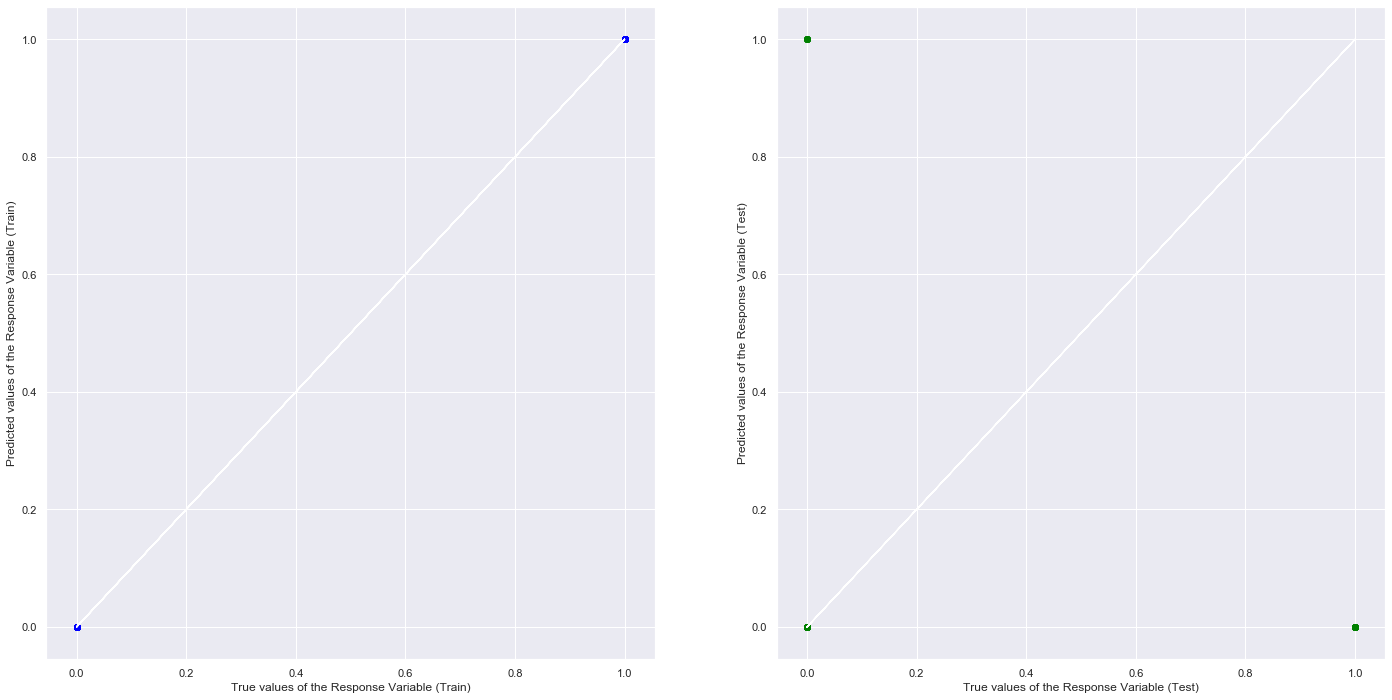

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6176470588235294
Mean Squared Error (MSE) 	: 0.38235294117647056



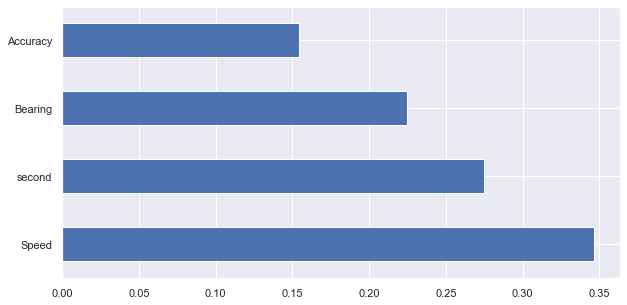

In [20]:
#Since the accuracy of the train dataset is significantly higher than the test dataset,the model is overfit and some estimators need to be removed.
columns = ["Accuracy", "Speed", "second", "Bearing"]

y = data["Dangerous"]
X = pd.DataFrame(data[columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

m = RandomForestClassifier(n_estimators=25, criterion='entropy')
m.fit(X_train, y_train)

y_train_pred = m.predict(X_train)
y_test_pred = m.predict(X_test)


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", m.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", m.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
    
feat_importances = pd.Series(m.feature_importances_, index=data[columns].columns)

f, axes = plt.subplots(1, 1, figsize=(10, 5))
feat_importances.nlargest(10).plot(kind='barh')